In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#to see plots in jupyter notebook
%matplotlib inline

In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
df.count()

loan_amnt               396030
term                    396030
int_rate                396030
installment             396030
grade                   396030
sub_grade               396030
emp_title               373103
emp_length              377729
home_ownership          396030
annual_inc              396030
verification_status     396030
issue_d                 396030
loan_status             396030
purpose                 396030
title                   394275
dti                     396030
earliest_cr_line        396030
open_acc                396030
pub_rec                 396030
revol_bal               396030
revol_util              395754
total_acc               396030
initial_list_status     396030
application_type        396030
mort_acc                358235
pub_rec_bankruptcies    395495
address                 396030
dtype: int64

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info.csv


In [ ]:
data_info=pd.read_csv('lending_club_info.csv')

In [ ]:
#feat_info('emp_title') this function gives description of the column name
#emp_title -> job title supplied at the time of applying for loan

In [ ]:
#unique employement title

df['emp_title'].nunique()

#so emp_title cannot be used as dummy variable,so drop it

173105

In [ ]:
df=df.drop('emp_title',axis=1)

In [ ]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_length_order=['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

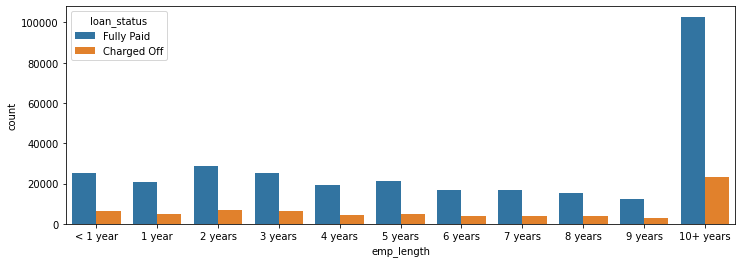

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [ ]:
#create new column loan_repaid with value 0/1

df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [ ]:
#this still doesnt tell us about emp_length and percent of charge off
#so we see per category percent of people did not pay loan

In [ ]:
emp_co=df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [ ]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [ ]:
emp_co/(emp_co+emp_fp)
#now ypu can see the percent of people per category

#percent is aprox same for all category(19 to 21 percent)
#no info from this

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [ ]:
#so
df=df.drop('emp_length',axis=1)

In [ ]:
#title column and purpose column may have repeated info
#title is subcategory of purpose
df=df.drop('title',axis=1)

In [ ]:
#mort_acc->number of mortgage accounts

df['mort_acc'].value_counts()


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
#mostly is zero, also it has around 10% NULL values ,so not informative
# but we cannot drop rows as it will drop 10% of data
#try to fill it(difficult)
#so we see which other column correlates with this mort_acc

df.corr()['mort_acc'].sort_values()

#total_acc correlates

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
# group the data frame by total_acc and calculate the mean for mort_acc per total_acc entries

df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [ ]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
# fill NULL values of mort_acc with these mean values

total_acc_mean=df.groupby('total_acc').mean()['mort_acc']

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_mean[total_acc]

  else:
    return mort_acc


In [ ]:
#way to apply function to two coulmn of data frame

df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
# for revol_util and pub_rec_bankruptcies we will delete those people(rows) as they are very less

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
# list of columns that are non numeric

df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
# 1. term->number of payment on the loans. can either be 36 months or 60 months
#can convert to numeric 36/60

df['term']=df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [ ]:
# 2. grade can be dropped as it is subset of subgrade

df=df.drop('grade',axis=1)

In [ ]:
# subgrade column to dummy variable

dummies=pd.get_dummies(df['sub_grade'],drop_first=True)#stop us from encoding duplicate information

# adding new column and deleting former sub_grade col
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.columns

#new columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:
# c can also be made dummy as sub_grade bcoz ther are also categorical

dummies=pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status','purpose']],drop_first=True)
df=pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
# home_ownership

df['home_ownership'].value_counts()

#most people are of three category(MORTGAGE,RENT,OWN )
#so we can replace none,any with other 

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [ ]:
#address

df['address']

#extract zipcode

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [ ]:
df['zip_code']=df['address'].apply(lambda address: address[-5:])

In [ ]:
df['zip_code'].unique()

#10 dummy variables we can make

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [ ]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [ ]:
df=df.drop('address',axis=1)

In [ ]:
#issue_d-> the month which the loan was funded
#no use

df=df.drop('issue_d',axis=1)

In [ ]:
#earliest_cr_line-> the month the borrower's earliest reported credit line was opened
#so we will extract year from this column

df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [ ]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [ ]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

In [ ]:
df=df.drop('loan_status',axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650',

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,  test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

#so 78 neuron per layer

(316175, 78)

In [ ]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

#binary classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [ ]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test),
          batch_size=256,
          epochs=25)

Epoch 1/25
1236/1236 [==============================] - 9s 6ms/step - loss: 0.2973 - val_loss: 0.2650
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2654 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2632 - val_loss: 0.2634
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2618 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2610 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2604 - val_loss: 0.2623
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2599 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2597 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2593 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.258

In [ ]:
# saving model

from tensorflow.keras.models import load_model

model.save('dl_project.h5')

In [ ]:
losses=pd.DataFrame(model.history.history).head()

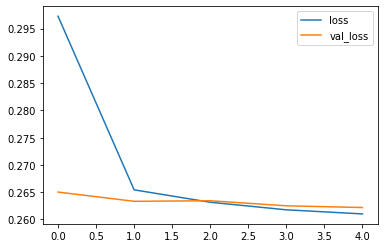

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#predictions=model.predict_classes(X_test)

predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 8s 3ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 6880  8778]
 [  125 63261]]


In [ ]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [ ]:
317696/len(df)

0.8038479931379817

0.8038479931379817

In [ ]:
#our data is imbalanced(80% are 1)
#so even if out model always predict 1,it is 80% accurate
#for 0,there is problen in recall
#but accuracy is better(89%) than default(80%)

In [ ]:
#now
#given the customer below will you give them the load or not

import random
random.seed(101)
random_ind=random.randint(0,len(df))

new_customer=df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
#this is pandas series,convert to numpy array

new_customer=scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.75362319, 0.2       , 0.        , 0.01593446,
        0.07340581, 0.29530201, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.  

In [ ]:
model.predict(new_customer)

1/1 [==============================] - 0s 26ms/step


array([[0.5784585]], dtype=float32)

In [ ]:
#now check if that person actually paid their loan

df.iloc[random_ind]['loan_repaid']

#so we got it right

1.0